# Debugging the BBVI Simple Mix Code

The goal of the following notebook is to test out the basic functionalities in the `bbvi_simplemix.R` code file to ensure that the analysis is proceeding correctly.

In [39]:
library(dplyr)
library(ggplot2)

source("bbvi_simplemix.R")

In [27]:
y = c(-1, 1)

mu = c(0.69856402, 1.3638203)
m = c(-0.5, 1)

ssq = c(1, 2)

phi = rbind(
    c(0.9,0.1),
    c(0.3,0.7)
)
z = rbind(
    c(1,0),
    c(0,1)
)

logp.all(y, z, mu, mu0 = 0)

-4.520618


In [4]:
logp.mu(y, z, mu)

[1] -1.962877 -2.087877

In [5]:
logp.z(y, z, mu)

[1] -0.125 -0.125

In [28]:
logq.all(z, mu, phi, m, ssq)

[1] -3.397855

In [7]:
logq.mu(z, mu, phi, m, ssq)

[1] -0.9189385 -1.3280121

In [8]:
logq.z(z, mu, phi, m, ssq)

[1] -0.1053605 -0.3566749

In [9]:
grad.mu_m(mu, m, ssq)

[1]  0.00 -0.25

In [10]:
grad.mu_ssq(mu, m, ssq)

[1] -0.50000 -0.21875

In [11]:
grad.z(z, phi)

1.111111,0.000000
0.000000,1.428571


In [29]:
grads <- rbind(
    grad.z(z, phi),
    matrix(grad.mu_m(mu, m, ssq), nrow=1, byrow = TRUE),
    matrix(grad.mu_ssq(mu, m, ssq), nrow=1, byrow = TRUE)
)

diff <- as.numeric(logp.all(y,z,mu) - logq.all(z, mu, phi, m, ssq))
grads * diff

-1.2475145,0.0000000
0.0000000,-1.6039472
-1.3457034,-0.2042420
-0.2450743,0.2621139


In [30]:
rbind(
    grad.z(z, phi),
    matrix(grad.mu_m(mu, m, ssq), nrow=1, byrow = TRUE),
    matrix(grad.mu_ssq(mu, m, ssq), nrow=1, byrow = TRUE)
)

1.1111111,0.0000000
0.0000000,1.4285714
1.1985640,0.1819101
0.2182779,-0.2334543


In [31]:
as.numeric(logp.all(y,z,mu) - logq.all(z, mu, phi, m, ssq))

[1] -1.122763

In [15]:
grads * diff

0.4123434,0.00000000
0.0000000,0.53015579
0.0000000,-0.09277726
-0.1855545,-0.08118010


In [16]:
dat <- list(
    method = "Naive",
    Z = rbind(
        data.frame(iter = 1, param = c("z1", "z2","m","ssq"), grads * diff),
        data.frame(iter = 2, param = c("z1", "z2","m","ssq"), grads * diff)
    )
)

generate_bbvi(dat)

param,X1,X2
<chr>,<dbl>,<dbl>
z1,0.4123434,0.00000000
z2,0.0000000,0.53015579
m,0.0000000,-0.09277726
ssq,-0.1855545,-0.08118010


In [17]:
mu <- sapply(m, function(x){
    return(rnorm(1, mean=x, sd=1))
})

mu

[1]  1.21732133 -0.03274831

In [25]:
y

[1] -1  1

In [36]:
dat <- generate_samples(S = 5, y, phi, m, ssq, method = "JS+")
dat

$Ancestor
    [,1] [,2]
     0.9  0.1
     0.3  0.7
m   -0.5  1.0
ssq  1.0  2.0

$MC
   iter param         X1         X2
1     1    z1  1.0000000  0.0000000
2     1    z2  0.0000000  1.0000000
3     1    mu -2.4140847  2.1687993
4     2    z1  1.0000000  0.0000000
5     2    z2  0.0000000  1.0000000
6     2    mu -1.3886720 -0.4087990
7     3    z1  1.0000000  0.0000000
8     3    z2  1.0000000  0.0000000
9     3    mu -2.0148348  1.0279638
10    4    z1  1.0000000  0.0000000
11    4    z2  0.0000000  1.0000000
12    4    mu  0.5029895  1.6177212
13    5    z1  1.0000000  0.0000000
14    5    z2  1.0000000  0.0000000
15    5    mu -0.9600668  0.7417993

$Z
   iter param           X1            X2
1     1    z1  -4.40735472  0.0000000000
2     1    z2   0.00000000 -5.6665989261
3     1     m   7.59244518 -2.3180909326
4     1   ssq  -5.28298191  0.3143090378
5     2    z1  -0.46221878  0.0000000000
6     2    z2   0.00000000 -0.5942812874
7     2     m   0.36968482  0.2930280055
8     2   ssq   0.04373417  0.0007948363
9     3    z1  -5.34914327  0.0000000000
10    3    z2 -16.04742980  0.0000000000
11    3     m   7.29276144 -0.0673120018
12    3   ssq  -3.11654987  1.2030866609
13    4    z1  -1.49810072  0.0000000000
14    4    z2   0.00000000 -1.9261294907
15    4     m  -1.35232137 -0.4164338244
16    4   ssq  -0.00403675  0.2727626655
17    5    z1  -0.97702317  0.0000000000
18    5    z2  -2.93106951  0.0000000000
19    5     m   0.40454629  0.1135206250
20    5   ssq   0.34660128  0.2125024370

$method
[1] "JS+"

In [37]:
generate_bbvi(dat)

param,X1,X2
<chr>,<dbl>,<dbl>
z1,-0.3852144,0.0000000
z2,-1.4449600,0.0000000
m,0.0000000,-0.2748666
ssq,0.0000000,0.4003917


In [40]:
generate_bbvi(dat, method="Naive")

param,X1,X2
<chr>,<dbl>,<dbl>
z1,-2.538768,0.0000000
z2,-3.795700,-1.6374019
m,2.861423,-0.4790576
ssq,-1.602647,0.4006911


In [41]:
generate_bbvi(generate_samples(S = 5, y, phi, m, ssq, method = "RB"))

param,X1,X2
<chr>,<dbl>,<dbl>
z1,-1.1029423,0.000000
z2,-0.4783572,-1.378822
m,-2.4631094,-2.970249
ssq,-1.8604124,-1.653487


In [35]:
unique(dat$Z$param)

[1] "z1"  "z2"  "m"   "ssq"

In [301]:
simplemix.bbvi(y, K = 2, maxiter = 5, mc_size = 5, method = "RB")

iter,time,param,X1,X2
<int>,<dbl>,<chr>,<dbl>,<dbl>
1,-0.0001226346,z1,0.5614887,0.4385113
1,-0.0001226346,z2,0.5353423,0.4646577
1,-0.0001226346,m,49.2557913,-17.1638733
1,-0.0001226346,ssq,8.5062348,1.9172713
2,-0.0002052506,z1,0.5607255,0.4392745
2,-0.0002052506,z2,0.5347512,0.4652488
2,-0.0002052506,m,49.2554260,-17.1639156
2,-0.0002052506,ssq,8.5061716,1.9173230
3,-0.0005715330,z1,0.5608909,0.4391091


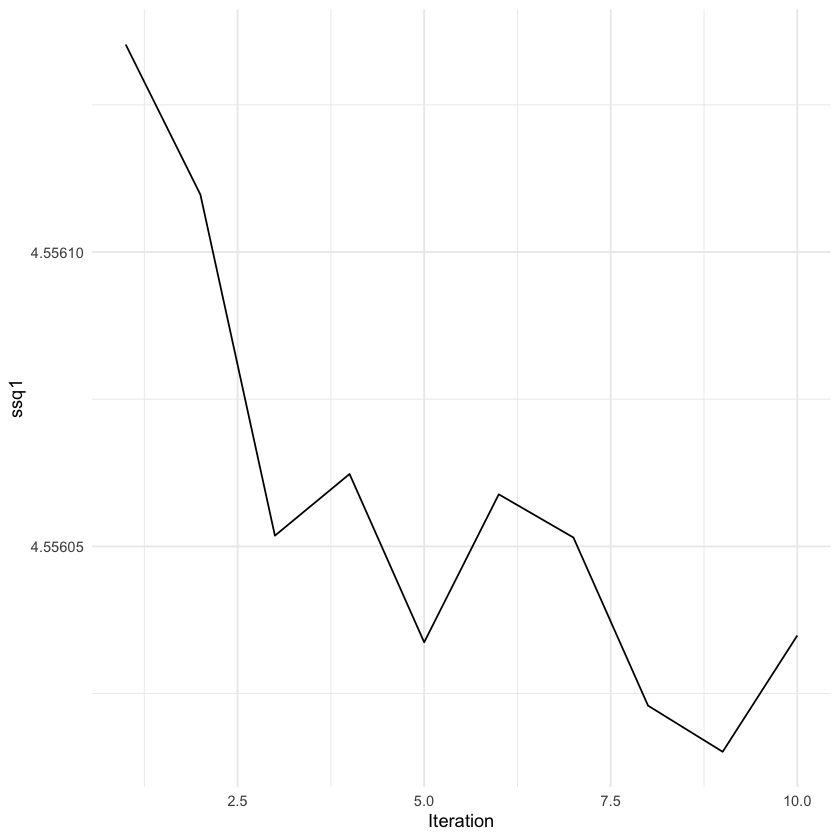

In [270]:
prior_list = list(
    tausq = 25,
    sigmasq = 1
)

trial_bbvi <- simplemix.bbvi(rnorm(50, 0, 5), K = 2, priors = prior_list, maxiter = 10, method="JS+")

trial_bbvi %>%
    filter(param == "ssq") %>%
    ggplot(aes(x = iter, y = X1)) +
    geom_line() +
    labs(x = "Iteration", y = "ssq1") +
    theme_minimal()

In [106]:
source("bbvi_simplemix.R")

dat <- generate_samples(S = 5, y = y, phi = phi, m = m, ssq = ssq, method = "JS+")
generate_bbvi(dat)

[1] -2.06795617 -1.98267315  0.89989238  0.07320746

In [8]:
source("bbvi_simplemix.R")
g <- c(1/2,1/3,1/4)
G <- g %*% t(g)
G
rate_adagrad(1)(1,G)

0.2500000,0.16666667,0.12500000
0.1666667,0.11111111,0.08333333
0.1250000,0.08333333,0.06250000


[1] 0.6831132 0.9138759 0.7128373